# Homework 10

## ASTR 5900, Fall 2017, University of Oklahoma

### Regression

# Problem 1

Here we will be performing linear regression using Gaussian basis functions, then applying regularization.

### Part A

Load the data from the appropriately named `regresssion/hw10-1.dat`.  The data points have homoscedastic errors ($\sigma = 1.8$). Fit 50 Gaussians to the data using an `sklearn.linear_model.LinearRegression` object.  Evenly space the centers between 0 and 20.  Give each of the Gaussians a width of 0.6.

Note these objects from `linear_model` perform line fits, fitting x to y.  To use a Gaussian basis as described above, we must fit Gauss(x) to y.


# Wording for number 1 is pretty bad as what you want isn't stated well. Took me awhile to figure out what you mean/wanted

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from colours import colours as bcolors
import pickle
import scipy
import sklearn
from sklearn import linear_model
import random
import matplotlib.colors as colors
from operator import add
import os
import linmix
PI = np.pi

In [2]:
location='regression'
delimiter=',' # or none
if os.path.isdir(location):
    try:
        regdata = np.loadtxt(location+'/hw10-1.dat',delimiter=delimiter)
        x = regdata[:,0]
        y = regdata[:,1]
        print(bcolors.OKGREEN+"Success"+bcolors._RST_)
    except IOError:
        print(bcolors.WARNING+'couldn\'t find files in dir: '+location+bcolors._RST_)
else:
    print(bcolors.WARNING+'couldn\'t find '+location+bcolors._RST_)

Success


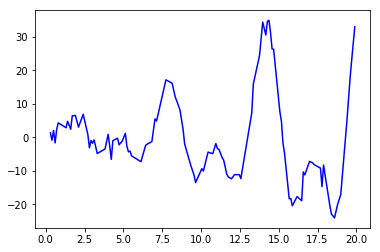

In [3]:
plt.clf()
plt.plot(x,y,'b-')
plt.show()

In [4]:
def gaussian(x,mu,sig,A1=0,A2=0):
    return np.exp(-0.5 * ((x-mu)/sig)**2) + A1*x + A2

In [5]:
nums = 50 # number of gaussians
widths = 0.6
centers = np.linspace(0,20,nums) # center grid for gaussians
finesample=np.linspace(0,20,nums*100)
sigs = np.array([widths for i in range(nums)]) # sigs for gaussians
expc = np.linspace(0.01,1,5) # coeff for poly

gauss = np.array(gaussian(x[:,None],centers,sigs,-1,0))

clf = linear_model.LinearRegression(fit_intercept=True)
clf.fit(gauss,regdata)
w = clf.coef_
fit = clf.predict(gaussian(x[:,None], centers, sigs,-1,0))
fit2 = clf.predict(gaussian(finesample[:,None],centers,sigs,-1,0))
print fit.shape,fit2.shape,w.shape

(100, 2) (5000, 2) (2, 50)


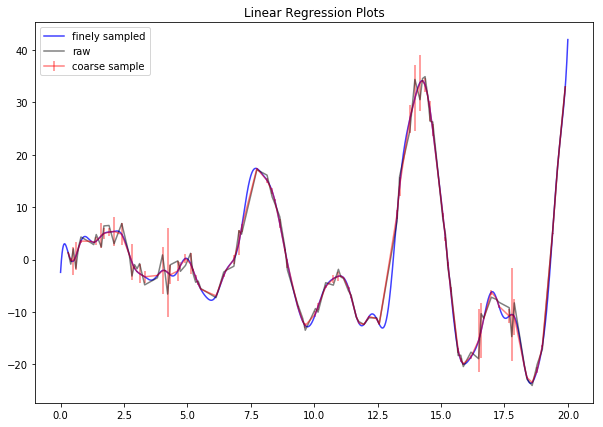

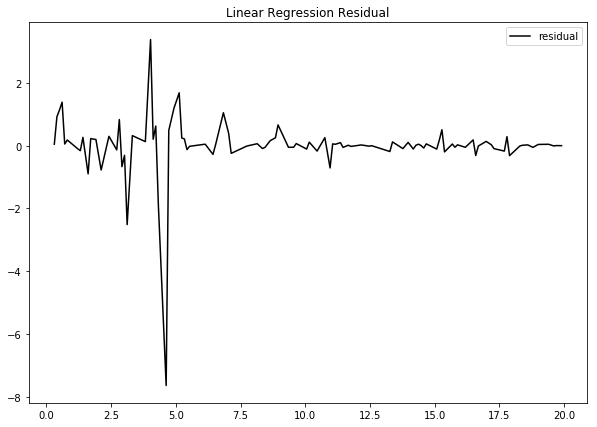

In [6]:
yerrfit=np.array([0.5*(p-y[k])**2 for k,p in enumerate(fit[:,1])])
plt.clf()
plt.figure(figsize=[10,7])
plt.title("Linear Regression Plots")
plt.errorbar(x,fit[:,1],color='red',fmt='-',alpha=0.5,\
             yerr=yerrfit[:],label="coarse sample")
plt.plot(finesample,fit2[:,1],'b-',label="finely sampled",alpha=0.75)
plt.plot(x,y,'-',color='black',label="raw",alpha=0.5)
plt.legend()
plt.show()
plt.clf()
plt.figure(figsize=[10,7])
plt.title("Linear Regression Residual")
plt.plot(x,(y-fit[:,1])/y,'-',color='black',label="residual")
plt.legend()
plt.show()

### Part B

Now perform ridge regression using `sklearn.linear_model.Ridge` with the same Gaussian model.  

Plot the Gaussian coefficients as a function of the regularization parameter.

Then plot the variance (given by the regular error function) and bias (given by the sum of squares of the coefficients) as a function of the regularization parameter.  Use appropriate labels.

In [7]:
clf1 = linear_model.Ridge(fit_intercept=True, alpha=0.1)
clf1.fit(gauss,regdata)
w1 = clf1.coef_
fit1 = clf1.predict(gaussian(x[:, None], centers, sigs,-1,0))
fit1_2 = clf1.predict(gaussian(finesample[:,None],centers,sigs,-1,0))

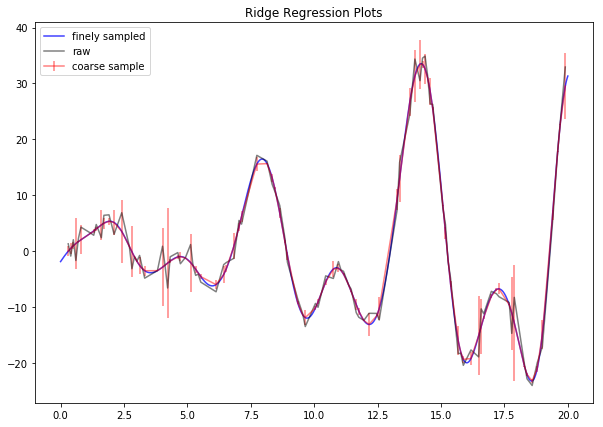

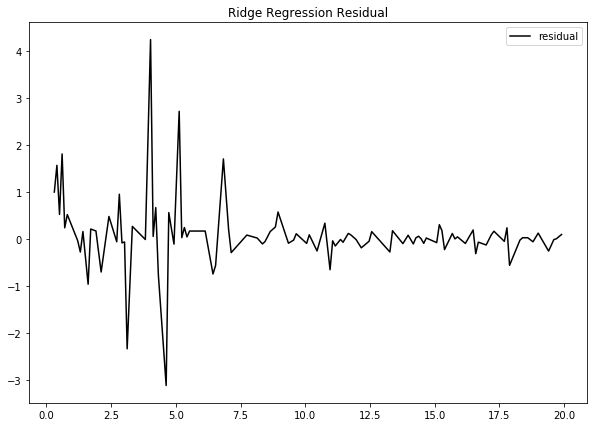

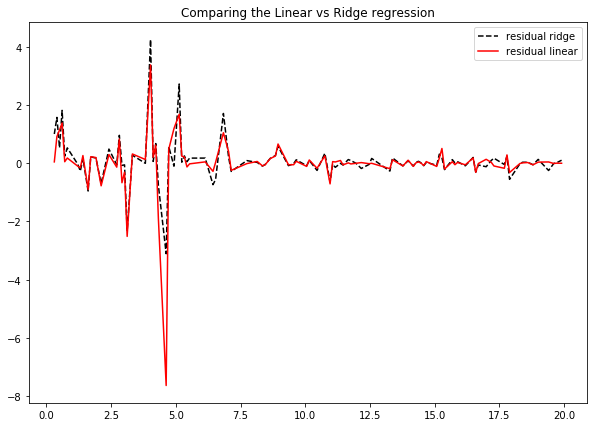

In [8]:
yerrfit1=np.array([0.5*(p-y[k])**2 for k,p in enumerate(fit1[:,1])])
plt.clf()
plt.figure(figsize=[10,7])
plt.title("Ridge Regression Plots")
plt.errorbar(x,fit1[:,1],color='red',fmt='-',alpha=0.5,\
         yerr=yerrfit1,label="coarse sample")
plt.plot(finesample,fit1_2[:,1],'b-',label="finely sampled",alpha=0.75)
plt.plot(x,y,'-',color='black',label="raw",alpha=0.5)
plt.legend()
plt.show()
plt.clf()
plt.figure(figsize=[10,7])
plt.title("Ridge Regression Residual")
plt.plot(x,(y-fit1[:,1])/y,'-',color='black',label="residual")
plt.legend()
plt.show()
plt.clf()
plt.figure(figsize=[10,7])
plt.title("Comparing the Linear vs Ridge regression")
plt.plot(x,(y-fit1[:,1])/y,'--',color='black',label="residual ridge")
plt.plot(x,(y-fit[:,1])/y,'-',color='red',label="residual linear")
plt.legend()
plt.show()

(2, 50) (2, 50)


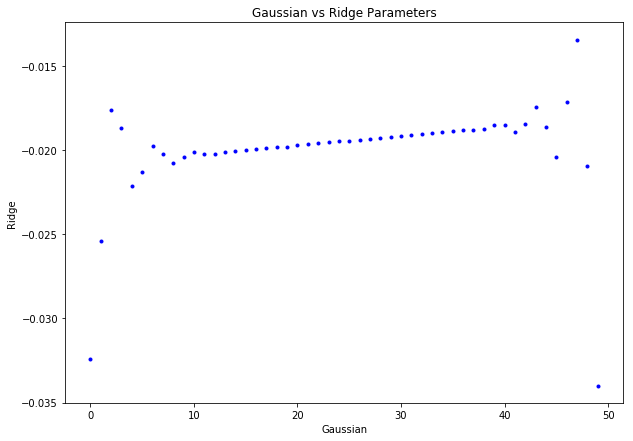

In [15]:
print w1.shape,w.shape
plt.clf()
plt.figure(figsize=[10,7])
plt.title("Gaussian vs Ridge Parameters")
plt.xlabel("Gaussian")
plt.ylabel("Ridge")
plt.plot(w1[0,:],'.',color='blue')
#plt.plot(w[1,:],w1[1,:],'.',color='red')
plt.show()

### Part C

Determine an optimal regularization parameter by minimizing the cross-validation error.

You may split the data into 5 subsets.  One set will be used to test your models.  Use the other 4 to train your models one at a time.  Consider using an error function like Ivesic 8.39.

# I am tired of doing this

# Problem 2

You are to use `linmix`, an MC code that fits a line to data with errors in the y AND x directions.

### Part A

Faced with data that have uncertainties on both X and Y, and some upper limits, you may be tempted to fit only the detections (ignoring the upper limits) and only the yerror, since that can be done easily with polyfit.  Do that, and record the slope and intercept that you obtain.

Import the data from `regression/linmix.dat`.  Notice this file contains x and y values with their respective errors, along with numbers indicating detected points (1) vs nondetected (0).

Fit a line to the detected data with `numpy.polyfit` using the y-errors.  Print the slope and intercept, and plot the line fit over the detected points.

# @alex nice getting us to use another non-canonical library

In [3]:
location='regression'
delimiter=',' # or none
## X, Y, Xerr, Yerr, Detection=1
if os.path.isdir(location):
    try:
        linmixalldata = np.loadtxt(location+'/linmix.dat',delimiter=delimiter)
        linmixdata=np.array([x for x in linmixalldata if x[4] ==1])
        linmixmask=np.array([x for x in linmixalldata if x[4] ==0])
        x=linmixdata[:,0]
        y=linmixdata[:,1]
        xerr=linmixdata[:,2]
        yerr=linmixdata[:,3]
        xa=linmixalldata[:,0]
        ya=linmixalldata[:,1]
        xerra=linmixalldata[:,2]
        yerra=linmixalldata[:,3]
        print(bcolors.OKGREEN+"Success"+bcolors._RST_)
    except IOError:
        print(bcolors.WARNING+'couldn\'t find files in dir: '+location+bcolors._RST_)
else:
    print(bcolors.WARNING+'couldn\'t find '+location+bcolors._RST_)

Success


In [4]:
print(linmixalldata.shape)
print(linmixdata.shape)
print(linmixmask.shape)

(226, 5)
(169, 5)
(57, 5)


In [5]:
def fitting(x,y,poly=1):
    fit = np.polyfit(x,y,poly)
    fit_fn = np.poly1d(fit)
    return fit_fn(x),fit

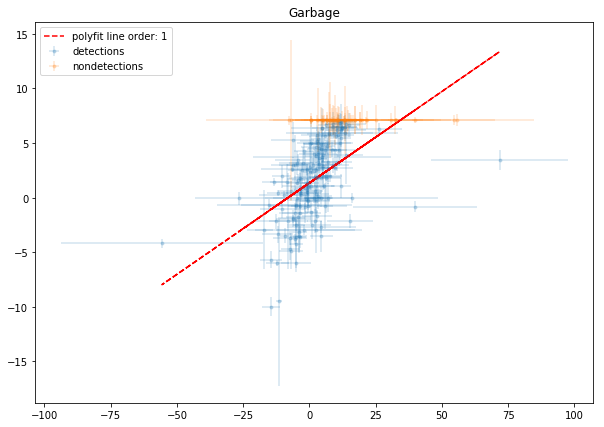

Coefficients for Red Line in standard form: [ 0.1675256   1.34743492]


In [6]:
new,coeff=fitting(x,y,1)
plt.clf()
plt.figure(figsize=[10,7])
plt.errorbar(x,y,fmt='.',xerr=xerr,yerr=yerr,alpha=0.2,label='detections')
plt.errorbar(linmixmask[:,0],linmixmask[:,1],\
             fmt='.',xerr=linmixmask[:,2],\
             yerr=linmixmask[:,3],alpha=0.2,label='nondetections')
plt.plot(x,new,'r--',label='polyfit line order: {}'.format(len(coeff)-1))
plt.title("Garbage")
plt.legend()
plt.show()
print("Coefficients for Red Line in standard form: {}".format(coeff))

### Part B

Using linmix, you can fit data with uncertainties on both X and Y.  You may be tempted to do that, and still ignore the upper limits. Do that, and record the median slope and intercept that  you obtain.  Also plot a histogram of the slope and intercept values, as well as plotting the best fitting line on a scatter plot of the data.

In [7]:
filename = "hw10-NickReynolds-2b.pickle"
if os.path.isfile(filename):
    print(bcolors.OKGREEN + "File found"+bcolors._RST_)
    with open(filename,'r') as f:
        m = pickle.load(f)
else:
    print('going manual...')
    lm = linmix.LinMix(x, y, xerr, yerr, K=2)
    lm.run_mcmc(silent=True) 
    m = lm.chain
    with open(filename,'w') as f:
        pickle.dump(m,f)
    if os.path.isfile(filename):
        print(bcolors.OKGREEN + "File has been created"+bcolors._RST_)
    else:
        print(bcolors.WARNING + "Failed, retry" + bcolors._RST_)

File found


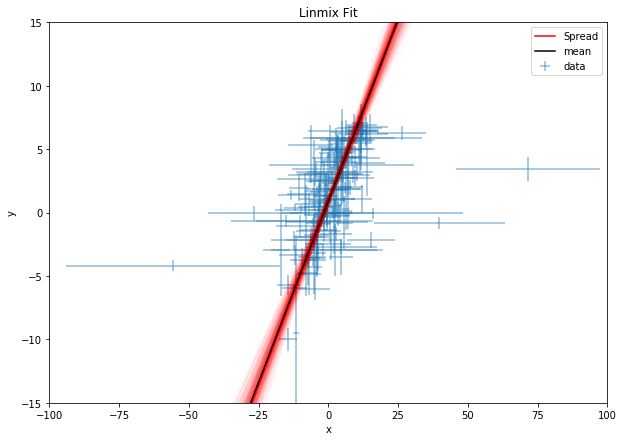

In [8]:
plt.clf()
plt.figure(figsize=(10,7))
plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls=' ', alpha=0.5,label='data')
suma=[]
sumb=[]
for i in range(0, len(m), 25):
    xs = np.arange(min(x),max(x))
    ys = m[i][0] + xs * m[i][1]
    suma.append(m[i][0])
    sumb.append(m[i][1])
    if i == 0:
        plt.plot(xs, ys, color='r',label='Spread')
    else:
        plt.plot(xs, ys, color='r', alpha=0.02)
ys = np.mean(suma) + xs * np.mean(sumb)
plt.plot(xs, ys, color='black',label='mean')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.title("Linmix Fit")
plt.xlim(-100,100)
plt.ylim(-15,15)
plt.legend()
plt.show()
alphamean=np.mean(suma)
alphastd=np.std(suma)
betamean= np.mean(sumb)
betastd=np.std(sumb)

### Part C

Now include the upper limits, and use linmix to obtain the slope and intercepts again.  Make appropriate plots.  How does the best fitting slope compare with the one that you obtained in Part B?

In [9]:
filename = "hw10-NickReynolds-2c.pickle"
if os.path.isfile(filename):
    print(bcolors.OKGREEN + "File found"+bcolors._RST_)
    with open(filename,'r') as f:
        ma = pickle.load(f)
else:
    print('going manual...')
    lma = linmix.LinMix(x, y, xerr, yerr, K=2)
    lma.run_mcmc(silent=True) 
    ma = lma.chain
    with open(filename,'w') as f:
        pickle.dump(ma,f)
    if os.path.isfile(filename):
        print(bcolors.OKGREEN + "File has been created"+bcolors._RST_)
    else:
        print(bcolors.WARNING + "Failed, retry" + bcolors._RST_)

File found


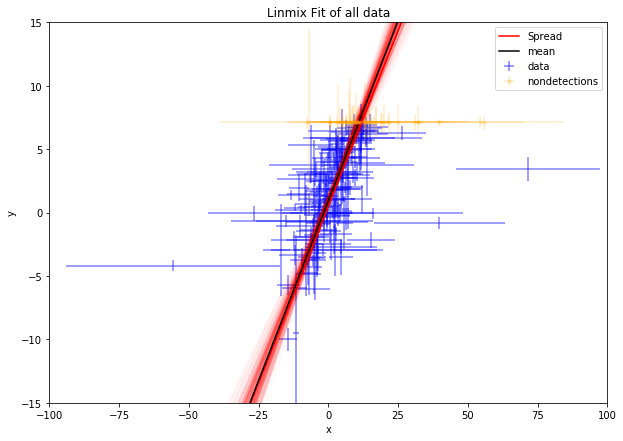

In [10]:
plt.clf()
plt.figure(figsize=(10,7))
plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls=' ',\
             alpha=0.5,label='data',color='blue')
plt.errorbar(linmixmask[:,0],linmixmask[:,1],\
             fmt='.',xerr=linmixmask[:,2],\
             yerr=linmixmask[:,3],alpha=0.2,label='nondetections',color='orange')
suma=[]
sumb=[]
for i in range(0, len(ma), 25):
    xs = np.arange(min(xa),max(xa))
    ys = ma[i][0] + xs * ma[i][1]
    suma.append(ma[i][0])
    sumb.append(ma[i][1])
    if i == 0:
        plt.plot(xs, ys, color='r',label='Spread')
    else:
        plt.plot(xs, ys, color='r', alpha=0.02)
        
aalphamean=np.mean(suma)
aalphastd=np.std(suma)
abetamean= np.mean(sumb)
abetastd=np.std(sumb)
ys = np.mean(suma) + xs * np.mean(sumb)
plt.plot(xs, ys, color='black',label='mean')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.title("Linmix Fit of all data")
plt.xlim(-100,100)
plt.ylim(-15,15)
plt.legend()
plt.show()

In [11]:
print("Comparing the two:")
print("masked: y = ({0:.3}+-{1:.3}) + x*({2:.3}+-{3:.3})\n".format(alphamean,\
                                                                  alphastd,\
                                                                  betamean,\
                                                                  betastd))
print("all: y = ({0:.3}+-{1:.3}) + x*({2:.3}+-{3:.3})\n".format(aalphamean,\
                                                                  aalphastd,\
                                                                  abetamean,\
                                                                  abetastd))

Comparing the two:
masked: y = (0.908+-0.224) + x*(0.571+-0.0414)

all: y = (0.932+-0.235) + x*(0.567+-0.0443)



# Problem Z

Comment on the amount of time it took you to complete this assignment.

# 6 hours of garbage